#Configurações Iniciais e Importação dos Dados

In [108]:
#Instalação das bibliotecas
import pandas as pd
import numpy as np
import scipy as sp
import plotly
import plotly.express as px
import plotly.graph_objs as go
!pip install chart_studio
import chart_studio.plotly as py

#Importação das tabelas
descricao_geologica = pd.read_csv("GEOLOGY.csv")
descricao_geotecnica = pd.read_csv("GEOTECH.csv")

In [71]:
#União das tabelas
dados = pd.merge(descricao_geotecnica, descricao_geologica, on=["hole_number","depth_from","depth_to"], how="left")
dados['depth_from'] = pd.to_numeric(dados['depth_from'])
dados['depth_to'] = pd.to_numeric(dados['depth_to'])
dados['weathering'] = pd.to_numeric(dados['weathering'], errors="coerce")

In [72]:
from IPython.display import display

display(dados)

,hole_number,depth_from,depth_to,discontinuity,filling,spacing,strength,weathering,fracturing_grade,CLV
0,6RI5NA4-GT-D00001,0.00,24.90,NaN,NaN,NaN,NaN,NaN,NaN,AT
1,6RI5NA4-GT-D00001,24.90,28.70,NaN,NaN,1,R2-,4.0,06,NaN
2,6RI5NA4-GT-D00001,28.70,33.25,6,KA,2,R3,3.0,04,NaN
3,6RI5NA4-GT-D00001,33.25,34.60,6,AG,1,R3,3.0,05,NaN
4,6RI5NA4-GT-D00001,34.60,39.10,6,MN,2,R5,1.0,04,NaN
...,...,...,...,...,...,...,...,...,...,...
148000,VGA4-GT-R00030,14.00,15.75,N,N,N,R4,4.0,*,NaN
148001,VGA4-GT-R00030,15.75,42.05,N,N,N,R1-,5.0,N,NaN
148002,VGA4-GT-R00030,42.05,47.70,11,SP,1,R3,4.0,06,NaN
148003,VGA4-GT-R00030,47.70,51.60,11,SP,2,R4,4.0,05,NaN


#Tratamento de Dados

In [74]:
df = dados.loc[:, ['hole_number', 'filling', 'weathering', 'depth_to', 'depth_from', 'CLV', 'strength', 'discontinuity', 'spacing','fracturing_grade']]
df #Criação do DataFrame

,hole_number,filling,weathering,depth_to,depth_from,CLV,strength,discontinuity,spacing,fracturing_grade
0,6RI5NA4-GT-D00001,NaN,NaN,24.90,0.00,AT,NaN,NaN,NaN,NaN
1,6RI5NA4-GT-D00001,NaN,4.0,28.70,24.90,NaN,R2-,NaN,1,06
2,6RI5NA4-GT-D00001,KA,3.0,33.25,28.70,NaN,R3,6,2,04
3,6RI5NA4-GT-D00001,AG,3.0,34.60,33.25,NaN,R3,6,1,05
4,6RI5NA4-GT-D00001,MN,1.0,39.10,34.60,NaN,R5,6,2,04
...,...,...,...,...,...,...,...,...,...,...
148000,VGA4-GT-R00030,N,4.0,15.75,14.00,NaN,R4,N,N,*
148001,VGA4-GT-R00030,N,5.0,42.05,15.75,NaN,R1-,N,N,N
148002,VGA4-GT-R00030,SP,4.0,47.70,42.05,NaN,R3,11,1,06
148003,VGA4-GT-R00030,SP,4.0,51.60,47.70,NaN,R4,11,2,05


In [75]:
df = df.dropna(axis = 0) #Remoção das linhas com valores nulos.
df

,hole_number,filling,weathering,depth_to,depth_from,CLV,strength,discontinuity,spacing,fracturing_grade
7,6RI5NA4-GT-D00001,SP,3.0,73.85,62.10,HMNS,R3,6,1,06
8,6RI5NA4-GT-D00001,SP,1.0,96.10,73.85,IDOC,R5,11,4,02
11,6RI5NA4-GT-D00001,CB,1.0,112.95,103.45,ICTC,R5,11,4,02
12,6RI5NA4-GT-D00001,CB,1.0,118.70,112.95,XTC,R5,5,4,02
13,6RI5NA4-GT-D00001,CB,1.0,120.55,118.70,ICTC,R5,11,4,02
...,...,...,...,...,...,...,...,...,...,...
147995,VGA4-GT-R00029,N,5.0,52.80,40.15,IF,R1-,N,N,N
147996,VGA4-GT-R00029,N,5.0,80.00,52.80,IF,R1-,N,N,N
147997,VGA4-GT-R00030,N,5.0,0.50,0.00,INF,R1-,N,N,N
147998,VGA4-GT-R00030,N,5.0,8.00,0.50,ICTF,R0,N,N,N


# Análise dos Dados

In [76]:
df['depth'] = (df['depth_to'] - df['depth_from'])/2 + df['depth_from'] #Média da distância percorrida depois que começou a furar de cada furo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
#Resistência e Profundidade

fig = px.scatter(df, x = "depth_to", y = "depth_from", color = 'strength', trendline = 'ols', title = "Distribuição da Resistência", width=1000, height=800)
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [18]:
#Resistência e Profundidade Média do Intervalo

fig = px.histogram(df, x = "depth", color = "strength", title = "Média da distância percorrida por cada furo e sua resistência", width=1000, height=800)
fig.show()

In [20]:
#Terceiro Plot

fig = px.pie(df, names = 'CLV', width=1000, height=800)
fig.update_traces(textposition = 'inside')
fig.update_layout(uniformtext_minsize=20, uniformtext_mode='hide')
fig.update_layout(margin=dict(t=0, b=0, l=0, r=0))
fig.show() #Mostra a porcentagens dos tipos de litologia

In [21]:
#Quarto Plot

fig = px.pie(df, names = 'strength', width=1000, height=800)
fig.update_layout(uniformtext_minsize=20, uniformtext_mode='show')
fig.update_layout(margin=dict(t=0, b=0, l=0, r=0))
fig.show() #Mostra a porcentagens dos tipos de strength

In [22]:
#Quinto plot

fig = px.pie(df, names = 'filling', width=1000, height=800)
fig.update_traces(textposition = 'inside')
fig.update_layout(uniformtext_minsize=20, uniformtext_mode='hide')
fig.update_layout(margin=dict(t=0, b=0, l=0, r=0))
fig.show() #Mostra a porcentagem dos minerais que estão preenchedos as fraturas

In [19]:
#Intemperismo e Profundidade Média do Intervalo

fig = px.histogram(df, x = "depth", color = "weathering", title = "Média da distância percorrida por cada furo e seu intemperismo", width=1000, height=800)
fig.show()

In [80]:
df['strength_R01'] = df['strength']
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,hole_number,filling,weathering,depth_to,depth_from,CLV,strength,discontinuity,spacing,fracturing_grade,depth,strength_R01
7,6RI5NA4-GT-D00001,SP,3.0,73.85,62.10,HMNS,R3,6,1,06,67.975,R3
8,6RI5NA4-GT-D00001,SP,1.0,96.10,73.85,IDOC,R5,11,4,02,84.975,R5
11,6RI5NA4-GT-D00001,CB,1.0,112.95,103.45,ICTC,R5,11,4,02,108.200,R5
12,6RI5NA4-GT-D00001,CB,1.0,118.70,112.95,XTC,R5,5,4,02,115.825,R5
13,6RI5NA4-GT-D00001,CB,1.0,120.55,118.70,ICTC,R5,11,4,02,119.625,R5
...,...,...,...,...,...,...,...,...,...,...,...,...
147995,VGA4-GT-R00029,N,5.0,52.80,40.15,IF,R1-,N,N,N,46.475,R1-
147996,VGA4-GT-R00029,N,5.0,80.00,52.80,IF,R1-,N,N,N,66.400,R1-
147997,VGA4-GT-R00030,N,5.0,0.50,0.00,INF,R1-,N,N,N,0.250,R1-
147998,VGA4-GT-R00030,N,5.0,8.00,0.50,ICTF,R0,N,N,N,4.250,R0


In [87]:
df['strength_R01']= df['strength'].replace(['R0','R1-','R1+','R2-','R2+','R3','R4','R5','R6'],[0,1,1.5,2,2.5,3,4,5,6])
df['fracturing_grade_R01']= df['fracturing_grade'].replace(['01','02','03','04','05','06','*','1','2','3','4','5','N'],[1,2,3,4,5,6,7,1,2,3,4,5,8])
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,hole_number,filling,weathering,depth_to,depth_from,CLV,strength,discontinuity,spacing,fracturing_grade,depth,strength_R01,fracturing_grade_R01
7,6RI5NA4-GT-D00001,SP,3.0,73.85,62.10,HMNS,R3,6,1,06,67.975,3.0,6
8,6RI5NA4-GT-D00001,SP,1.0,96.10,73.85,IDOC,R5,11,4,02,84.975,5.0,2
11,6RI5NA4-GT-D00001,CB,1.0,112.95,103.45,ICTC,R5,11,4,02,108.200,5.0,2
12,6RI5NA4-GT-D00001,CB,1.0,118.70,112.95,XTC,R5,5,4,02,115.825,5.0,2
13,6RI5NA4-GT-D00001,CB,1.0,120.55,118.70,ICTC,R5,11,4,02,119.625,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147995,VGA4-GT-R00029,N,5.0,52.80,40.15,IF,R1-,N,N,N,46.475,1.0,8
147996,VGA4-GT-R00029,N,5.0,80.00,52.80,IF,R1-,N,N,N,66.400,1.0,8
147997,VGA4-GT-R00030,N,5.0,0.50,0.00,INF,R1-,N,N,N,0.250,1.0,8
147998,VGA4-GT-R00030,N,5.0,8.00,0.50,ICTF,R0,N,N,N,4.250,0.0,8


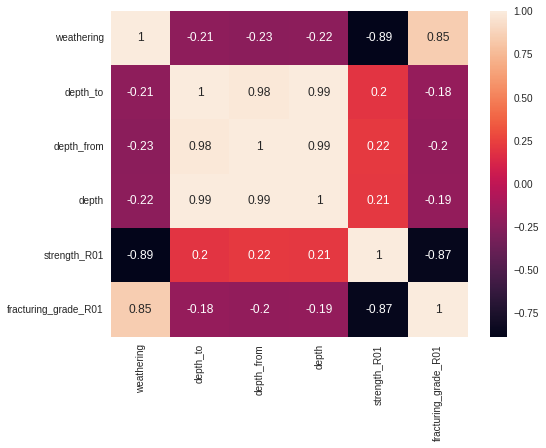

In [88]:
corr_df = df.corr(method='pearson')

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

# Algoritmos de Machine Learning

In [89]:
#Filtrando as colunas relevantes
geo = df.filter(items=['hole_number','depth','CLV','strength','fracturing_grade','weathering'])
geo

,hole_number,depth,CLV,strength,fracturing_grade,weathering
7,6RI5NA4-GT-D00001,67.975,HMNS,R3,06,3.0
8,6RI5NA4-GT-D00001,84.975,IDOC,R5,02,1.0
11,6RI5NA4-GT-D00001,108.200,ICTC,R5,02,1.0
12,6RI5NA4-GT-D00001,115.825,XTC,R5,02,1.0
13,6RI5NA4-GT-D00001,119.625,ICTC,R5,02,1.0
...,...,...,...,...,...,...
147995,VGA4-GT-R00029,46.475,IF,R1-,N,5.0
147996,VGA4-GT-R00029,66.400,IF,R1-,N,5.0
147997,VGA4-GT-R00030,0.250,INF,R1-,N,5.0
147998,VGA4-GT-R00030,4.250,ICTF,R0,N,5.0


In [92]:
#Divisão dos dados em categóricos
X_geo = geo.iloc[:,0:5].values
y_geo = geo.iloc[:, 5].values
y_geo= y_geo.astype(str)
y_geo

array(['3.0', '1.0', '1.0', ..., '5.0', '5.0', '4.0'], dtype='<U32')

In [93]:
#Pré processamento
from sklearn.preprocessing import LabelEncoder
label_encoder_nome = LabelEncoder()
label_encoder_depth = LabelEncoder()
label_encoder_lithology = LabelEncoder()
label_encoder_strength = LabelEncoder()
label_encoder_fracturing_grade = LabelEncoder()
label_encoder_weathering = LabelEncoder()

X_geo[:,0] = label_encoder_nome.fit_transform(X_geo[:,0])
X_geo[:,1] = label_encoder_depth.fit_transform(X_geo[:,1])
X_geo[:,2] = label_encoder_lithology.fit_transform(X_geo[:,2])
X_geo[:,3] = label_encoder_strength.fit_transform(X_geo[:,3])
X_geo[:,4] = label_encoder_fracturing_grade.fit_transform(X_geo[:,4])
y_geo = label_encoder_weathering.fit_transform(y_geo)

In [100]:
#Divisão da base em treinamento e teste
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X_geo,y_geo, test_size=0.2)
import pickle
with open('geo.pkl','wb') as f:
  pickle.dump([X_treino,y_treino],f)

acuracias: [0.60631001 0.56868132 0.61813187 0.57554945 0.61813187]
acuracia final: 0.5973609038423853 +- 0.021171729179952012


0.595166163141994

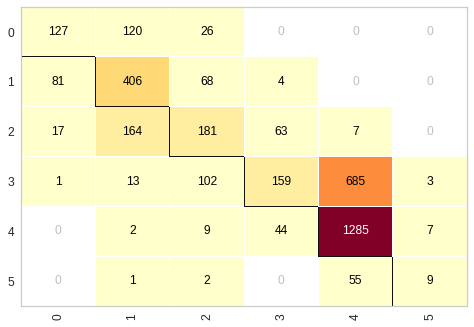

In [101]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
with open('geo.pkl','rb') as f:
  X_treino, y_treino = pickle.load(f)
naive_geo = GaussianNB()
naive_geo.fit(X_treino, y_treino)

#Validação
from sklearn.model_selection import cross_val_score

scores_dt = cross_val_score(naive_geo, X_teste, y_teste, scoring='accuracy', cv=5)
print("acuracias:", scores_dt)
print("acuracia final:", np.mean(scores_dt), "+-", np.std(scores_dt))

#Matriz de confusão
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(naive_geo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)



0.595166163141994

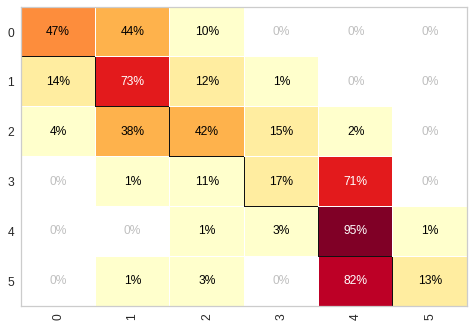

In [102]:
#Matriz de confusão (porcentagem)
cm = ConfusionMatrix(naive_geo , percent= True)
cm.fit(X_treino, y_treino)
cm.score(X_teste,y_teste)

acuracias: [0.36076818 0.36126374 0.35164835 0.33104396 0.37774725]
acuracia final: 0.35649429445725744 +- 0.015257160667419839


0.3985168909640209

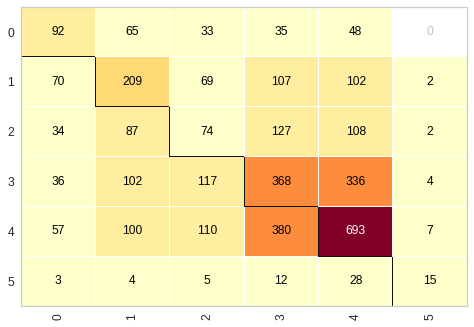

In [103]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
with open('geo.pkl','rb') as f:
  X_treino, y_treino = pickle.load(f)
knn_geo = KNeighborsClassifier()
knn_geo.fit(X_treino, y_treino)

#Validação
from sklearn.model_selection import cross_val_score

scores_dt = cross_val_score(knn_geo, X_teste, y_teste, scoring='accuracy', cv=5)
print("acuracias:", scores_dt)
print("acuracia final:", np.mean(scores_dt), "+-", np.std(scores_dt))

#Matriz de Confusão
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_geo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

0.3985168909640209

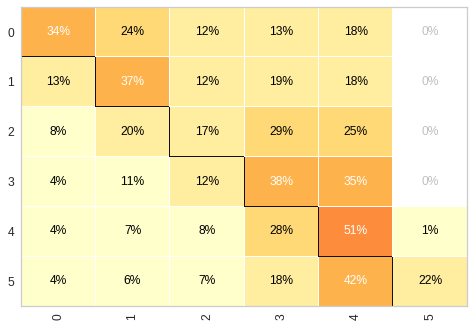

In [104]:
#Matriz de confusão (porcentagem)
cm = ConfusionMatrix(knn_geo , percent= True)
cm.fit(X_treino, y_treino)
cm.score(X_teste,y_teste)

acuracias: [0.6776406  0.69093407 0.68681319 0.70054945 0.73489011]
acuracia final: 0.6981654833506685 +- 0.01978292303350411


0.7530898104916232

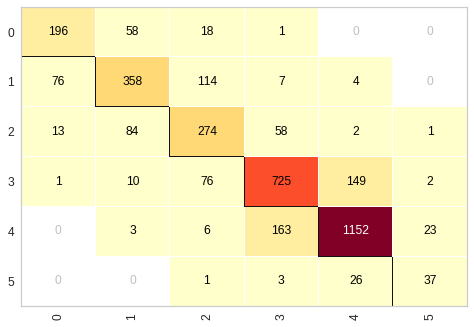

In [107]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
with open('geo.pkl','rb') as f:
  X_treino, y_treino = pickle.load(f)

arvore_geo = DecisionTreeClassifier(criterion='entropy')
arvore_geo.fit(X_treino, y_treino)

#Validação
from sklearn.model_selection import cross_val_score

scores_dt = cross_val_score(arvore_geo, X_teste, y_teste, scoring='accuracy', cv=5)
print("acuracias:", scores_dt)
print("acuracia final:", np.mean(scores_dt), "+-", np.std(scores_dt))

#Matriz de Confusão
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_geo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

0.7528151606701455

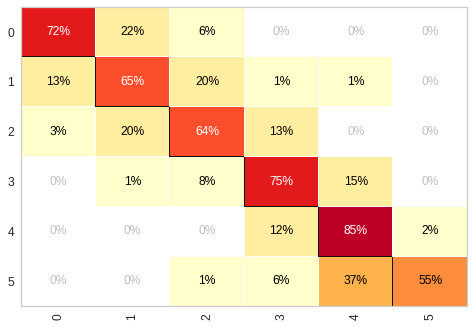

In [106]:
#Matriz de confusão (porcentagem)
cm = ConfusionMatrix(arvore_geo , percent= True)
cm.fit(X_treino, y_treino)
cm.score(X_teste,y_teste)